# Setup

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.core.numeric import indices
from sklearn.datasets import fetch_california_housing
from sklearn import preprocessing

In [11]:
#get data
california_housing = fetch_california_housing(as_frame = True)
y = california_housing.target.values
x = california_housing.data

In [13]:
#scale
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

In [14]:
#split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [15]:
#mean square error
def meanSquareError(x, y, theta):
  m = len(y)
  mse = (1 / m) * np.sum(np.square(x.dot(theta) - y))
  return mse

# 1. Batch Gradient Descent

In [16]:
#gradient descent
def gradientDescent(x, y, eta, n_iterations):
  m = len(y)
  theta = np.random.randn(x.shape[1],1) 
  mses = np.zeros(n_iterations)

  #for each iteration
  for i in range(n_iterations):
    #caluclate gradient
    gradients = (1 / m) * x.T.dot(x.dot(theta) - y)
    #update theta
    theta = theta - (eta * gradients)
    #mse
    mses[i] = meanSquareError(x, y, theta)
  return theta, mses

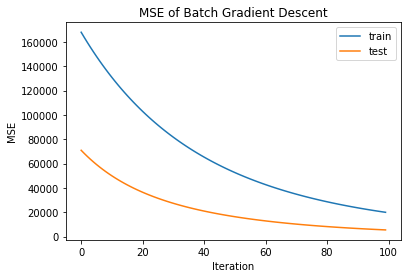

In [18]:
eta = .01
n_iterations = 100

#train
x_b = np.c_[np.ones((len(x_train),1)), x_train]
theta, mses = gradientDescent(x_b, y_train, eta, n_iterations)

#test
x_b_test = np.c_[np.ones((len(x_test),1)), x_test]
theta_test, mses_test = gradientDescent(x_b_test, y_test, eta, n_iterations)

#plots
plt.plot(range(n_iterations), mses, label = 'train')
plt.plot(range(n_iterations), mses_test, label = 'test')
plt.legend(loc = 'upper right')
plt.title('MSE of Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

# 2. Stochastic Gradient Descent

In [19]:
def stocashticGradientDescent(x, y, eta, n_iterations):
  m = len(y)
  theta = np.random.randn(x.shape[1],1)
  mses = np.zeros(n_iterations)

  #for each iteration
  for i in range(n_iterations):
    for j in range(m):
      #find random index
      index = np.random.randint(m)
      #get x and y values
      xi = x[index:index + 1]
      yi = y[index:index + 1]
      #caluclate gradients
      gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
      #update theta
      theta = theta - eta * gradients
      #mse
      mses[i] = meanSquareError(xi, yi, theta)
      return theta, mses

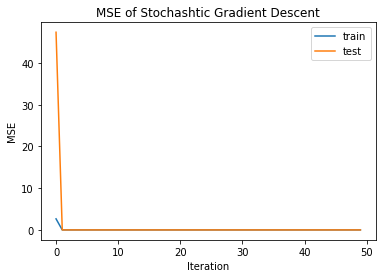

In [28]:
eta = .001
n_iterations = 50

#train
theta, mses = stocashticGradientDescent(x_b, y_train, eta, n_iterations)

#test
theta_test, mses_test = stocashticGradientDescent(x_b_test, y_test, eta, n_iterations)

#plots
plt.plot(range(n_iterations), mses, label = 'train')
plt.plot(range(n_iterations), mses_test, label = 'test')
plt.legend(loc = 'upper right')
plt.title('MSE of Stochashtic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

# 3. Minibatch Gradient Descent

In [29]:
def minibatchGradientDescent(x, y, eta, n_iterations, batch_size):
  m = len(y)
  theta = np.random.randn(x.shape[1],1)
  mses = np.zeros(n_iterations)

  for i in range(n_iterations):
    #find random indices
    indices = np.random.permutation(m)
    #get mini batch
    x_mini = x[indices]
    y_mini = y[indices]

    #for each mini batch
    for i in range(0, m, batch_size):
      #get x and y values
      xi = x_mini[i:i + batch_size]
      yi = y_mini[i:i + batch_size]
      #caluclate gradients
      gradients = (1 / m) * xi.T.dot(xi.dot(theta) - yi)
      #update theta
      theta = theta - eta * gradients
      #mse
      mses[i] = meanSquareError(xi, yi, theta)
      return theta, mses

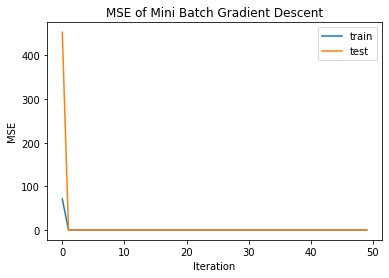

In [32]:
eta = .001
n_iterations = 50
batch_size = 20

#train      
theta, mses = minibatchGradientDescent(x_b, y_train, eta, n_iterations, batch_size)

#test     
theta_test, mses_test = minibatchGradientDescent(x_b_test, y_test, eta, n_iterations, batch_size)

#plot
plt.plot(range(n_iterations), mses, label = 'train')
plt.plot(range(n_iterations), mses_test, label = 'test')
plt.legend(loc = 'upper right')
plt.title('MSE of Mini Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()